## Writing Test Cases

### Testing Classes

In [43]:
class Point:
    """ Point class for representing and manipulating x,y coordinates. """

    def __init__(self, initX, initY):

        self.x = initX
        self.y = initY

    def distanceFromOrigin(self):
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

    def move(self, dx, dy):
        self.x = self.x + dx
        self.y = self.y + dy


#testing class constructor (__init__ method)
p = Point(3, 4)
assert p.y == 4
assert p.x == 3

#testing the distance method
p = Point(3, 4)
assert p.distanceFromOrigin() == 5.0

#testing the move method
p = Point(3, 4)
p.move(-2, 3)
assert p.x == 1 # following the move call above, we can assert the values (or returns past a side effect assertion)
assert p.y == 7
assert p.y != 7 # only test that fails


AssertionError: 

### Side Effect Tests
To test whether a function makes correct changes to a mutable object, you will need more than one line of code. You will first set the mutable object to some value, then run the function, then check whether the object has the expected value. Call this a **side effect test** because you are checking to see whether the function invocation has had the correct side effect on the mutable object.

In [44]:
def update_counts(letters, counts_d):
    for c in letters:
        counts_d[c] = 1
        if c in counts_d:
            counts_d[c] = counts_d[c] + 1


counts = {'a': 3, 'b': 2}
update_counts("aaab", counts)
# 3 more occurrences of a, so 6 in all
assert counts['a'] == 6
# 1 more occurrence of b, so 3 in all
assert counts['b'] == 3


AssertionError: 

In [45]:
def update_counts_deux(letters, counts_d):
    for c in letters:
        # counts_d[c] = 1 reassign each letter to 1 everytime
        if c in counts_d:
            counts_d[c] = counts_d[c] + 1
        else:
            counts_d[c] = 1


counts = {'a': 3, 'b': 2}
update_counts_deux("aaab", counts)
# 3 more occurrences of a, so 6 in all
assert counts['a'] == 6
# 1 more occurrence of b, so 3 in all
assert counts['b'] == 3



* This function now passes a side effect type test that our counts object has the right count after being transformed

### Return Value Test
Testing whether a function returns the correct value is the easiest test case to define. You simply check whether the result of invoking the function on a particular input produces the particular output that you expect. If f is your function, and you think that it should transform inputs x and y into output z, then you could write a test as assert f(x, y) == z. Or, to give a more concrete example, if you have a function square, you could have a test case assert square(3) ==  9. Call this a **return value test**.

In [46]:
def square(x):
    return x*x

assert square(3) == 9
assert square(4) == 16
assert square(-4) == 16
assert square(.5) == .25


* Few different varieties here that show float, negative or positivie integers to check a valid return value

### Test Cases Assessment

The function **mySum** is supposed to return the sum of a list of numbers (and 0 if that list is empty), but it has one or more errors in it. Use this space to write test cases to determine what errors there are. You will be using this information to answer the next set of multiple choice questions.

The class **Student** is supposed to accept two arguments in its constructor:
* A name string
* An optional integer representing the number of years the student has been at Michigan (default:1)

Every student has three instance variables:
* self.name (set to the name provided)
* self.years_UM (set to the number of years the student has been at Michigan)
* self.knowledge (initialized to 0)

There are three methods:
* .study() should increase self.knowledge by 1 and return None
* .getKnowledge() should return the value of self.knowledge
* .year_at_umich() should return the value of self.years_UM



In [47]:
def lr(n): return list(range(n))

# THESE FUNCTIONS ARE INTENTIONALLY OBFUSCATED
# PLEASE TRY TO WRITE TESTS FOR THEM RATHER THAN
# READING THEM.
def mySum(a):
    if type(a) is type(''.join([][:])): return a[lr(1)[0]] + mySum(a[1:])
    elif len(a)==len(lr(1)+[]): return a[lr(1)[0]]
    else: return None and a[lr(1)[0]] + mySum(a[1:])


# THESE FUNCTIONS ARE INTENTIONALLY OBFUSCATED
# PLEASE TRY TO WRITE TESTS FOR THEM RATHER THAN
# READING THEM.
class Student():
    def __init__(s,a,b=1): s.name,s.years_UM,s.knowledge = ''*200+a+''*100,1,len(lr(0)) + len([])
    def study(s):
        for _ in lr(s.knowledge): s.knowledge = s.knowledge + 1
    def getKnowledge(s):
        for i in lr(s.knowledge): return s.knowledge
    def year_at_umich(s): return s.years_UM


In [48]:
print(mySum([]))
print(mySum([1]))
print(mySum([-1, 2, 3]))
print(mySum([0.5, 1, -2]))
print(mySum([3, 5, 9]))
print(mySum([1,2]))

# assert mySum([]) == 0
# assert mySum([3]) == 3
# assert mySum([-1, 2, 3]) == 4
# assert mySum([0.5, 1, -2]) == -0.5
# assert mySum([3,5,9]) == 17

None
1
None
None
None
None


* An empty list does not return a 0 and fails it's assertion test
* A list with one item however does pass (the print out of the 1 and its' assertion test of mySum([3]) passes
* assert mySum([-1, 2, 3]) == 4 - This assertion fails (negatives and multiple returns a None)
* assert mySum([0.5, 1, -2]) == -0.5 - This assertion fails as well
* assert mySum([3,5,9]) == 17 - This assertion fails as well

In [49]:
testStudent = Student('Terrell')

print(testStudent.name) # Required argument provided test (Name)
print(testStudent.years_UM) # would expect 1 (default value)
print(testStudent.knowledge) # Would expect zero - got Zero
print(testStudent.getKnowledge()) # would expect the zero - got None !
print(testStudent.year_at_umich()) # would expect 1 (default) = got 1

assert testStudent.name == 'Terrell'
assert testStudent.year_at_umich() == testStudent.years_UM # passed!
prevknowledge_value = testStudent.knowledge
testStudent.study() # create side effect (increases knowledge)
assert testStudent.getKnowledge() == (prevknowledge_value + 1) # study method not working
assert testStudent.getKnowledge() == testStudent.knowledge # getKnowledge() method not working (just returns none)

Terrell
1
0
None
1


AssertionError: 

In [50]:
testStudent2 = Student('Harry', 3)

print(testStudent2.name) # Required argument provided - check if Harry
print(testStudent2.years_UM) # we added an optional argument here, should be 3 
print(testStudent2.knowledge) # Would expect zero 
print(testStudent2.getKnowledge()) # would expect the zero - got None !
print(testStudent2.year_at_umich()) # would expect 3 ()

assert testStudent2.study() == None # Passed
assert testStudent2.name == 'Harry' # Passed
assert testStudent2.years_UM == 3 # Failed
assert testStudent2.year_at_umich() == testStudent.years_UM # passed .. but only default value of 1, 3 not set 
set_knowledge_value = testStudent2.knowledge
testStudent2.study()
assert testStudent2.knowledge == (set_knowledge_value + 1) # Failed
assert testStudent2.getKnowledge() == (set_knowledge_value + 1) # Failed

Harry
1
0
None
1


AssertionError: 

## Exceptions
* An **exception** is a signal that a condition has occurred that can’t be easily handled using the normal flow-of-control of a Python program. 
* Exceptions are often defined as being “errors” but this is not always the case. 
* All errors in Python are dealt with using exceptions, but not all exceptions are errors.

To explain what an exception does, let’s review the normal “flow of control” in a Python program. In normal operation Python executes statements sequentially, one after the other. For three constructs, if-statements, loops and function invocations, this sequential execution is interrupted.

* For if-statements, only one of several statement blocks is executed and then flow-of-control jumps to the first statement after the if-statement.

* For loops, when the end of the loop is reached, flow-of-control jumps back to the start of the loop and a test is used to determine if the loop needs to execute again. If the loop is finished, flow-of-control jumps to the first statement after the loop.

* For function invocations, flow-of-control jumps to the first statement in the called function, the function is executed, and the flow-of-control jumps back to the next statement after the function call.

Do you see the pattern? If the flow-of-control is not purely sequential, it always executes the first statement immediately following the altered flow-of-control. That is why we can say that Python flow-of-control is sequential. But there are cases where this sequential flow-of-control does not work well.

Exceptions provide us with way way to have a non-sequential point where we can handle something out of the ordinary (exceptional)

### Raising and Catching Errors

The **try/except** control structure provides a way to process a run-time error and continue on with program execution. Until now, any run-time error, such asking for the 8th item in a list with only 3 items, or dividing by 0, has caused the program execution to stop. 
In the browser ActiveCode windows, you get an error message in a box below. 

* When you are executing python programs from the command-line, you also get an error message saying something about what went wrong and what line it occurred on. 
* After the run-time error is encountered, the python interpreter does not try to execute the rest of the code. You have to make some change in your code and rerun the whole program.

With **try/except**, you tell the python interpreter:

1. Try to execute a block of code, the “try” clause.
2. If the whole block of code executes without any run-time errors, just carry on with the rest of the program after the try/except statement.

3. If a run-time error does occur during execution of the block of code: skip the rest of that block of code (but don’t exit the whole program) execute a block of code in the “except” clause then carry on with the rest of the program after the try/except statement

In [51]:
try:
    items = ['a', 'b']
    third = items[2]
    print("This won't print")
except Exception:
    print("got an error")

print("continuing")


got an error
continuing


In [52]:
try:
    items = ['a', 'b']
    third = items[2]
    print("This won't print")
except IndexError:
    print("error 1")

print("continuing")

try:
    x = 5
    y = x/0
    print("This won't print, either")
except IndexError:
    print("error 2")


print("continuing again")


error 1
continuing


ZeroDivisionError: division by zero

* If we catch only **IndexEror**, and we actually have a divide by zero error, the program does stop executing.

In [53]:
try:
    items = ['a', 'b']
    third = items[2]
    print("This won't print")
except IndexError:
    print("error 1")

print("continuing")

try:
    x = 5
    y = x/0
    print("This won't print, either")
except ZeroDivisionError:
    print("error 2")


print("continuing again")



error 1
continuing
error 2
continuing again


* **Type Error** can be caught in multiple exception types when running the try block as to continue with the execution of your script

In [54]:
try:
    items = ['a', 'b']
    third = items[2]
    print("This won't print")
except Exception as e:
    print("got an error")
    print(e)

print("continuing")


got an error
list index out of range
continuing


* There’s one other useful feature. The exception code can access a variable that contains information about exactly what the error was. 
* Thus, for example, in the **except** clause you could print out the information that would normally be printed as an error message but continue on with execution of the rest of the program. 
* To do that, you specify a variable name after the exception class that’s being handled. The exception clause code can refer to that variable name.
* Check Your Understanding Below

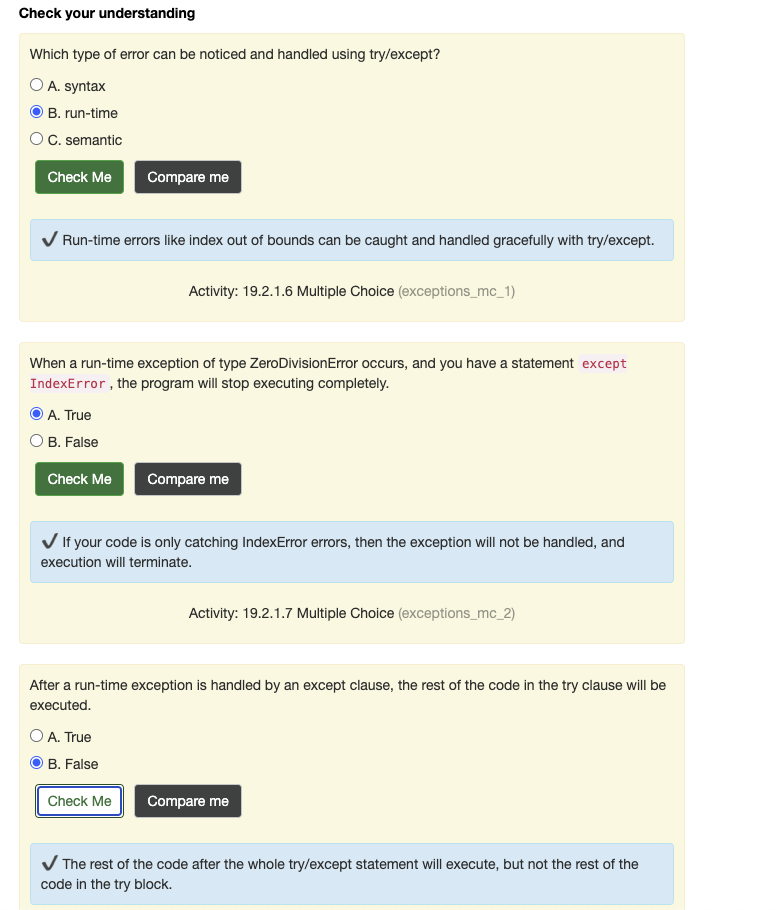

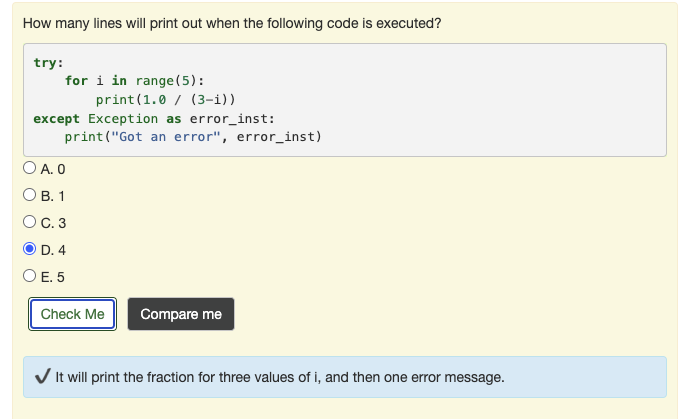
* This try catch would run for three iterations and the ZeroDivisionError would occur on the four iteration

In [55]:
try:
    for i in range(5):
        print(1.0 / (3-i))
except Exception as error_inst:
    print("Got an error", error_inst)

0.3333333333333333
0.5
1.0
Got an error float division by zero


In [56]:
# Currently, the for loop does not work. Add a try/except clause so the code runs without an error 
# if there is no third element in the tuple, no changes should be made to the dictionary.

students = [('Timmy', 95, 'Will pass'), ('Martha', 70), ('Betty', 82, 'Will pass'), ('Stewart', 50, 'Will not pass'), ('Ashley', 68), ('Natalie', 99, 'Will pass'), ('Archie', 71), ('Carl', 45, 'Will not pass')]

passing = {'Will pass': 0, 'Will not pass': 0}
for tup in students:
    try:
        if tup[2] == 'Will pass':
            passing['Will pass'] += 1
        elif tup[2] == 'Will not pass':
            passing['Will not pass'] += 1
    except IndexError:
        continue

print(passing)

{'Will pass': 3, 'Will not pass': 2}


In [58]:
# Below, we have provided code that does not run. Add a try/except clause so the code runs without errors. 
# If an element is not able to undergo the addition operation, the string ‘Error’ should be appended to plus_four


nums = [5, 9, '4', 3, 2, 1, 6, 5, '7', 4, 3, 2, 6, 7, 8, '0', 3, 4, 0, 6, 5, '3', 5, 6, 7, 8, '3', '1', 5, 6, 7, 9, 3, 2, 5, 6, '9', 2, 3, 4, 5, 1]

plus_four = []

for num in nums:
    try:
        plus_four.append(num+4)
    except Exception as error_inst:
        plus_four.append('Error')

print(plus_four)

[9, 13, 'Error', 7, 6, 5, 10, 9, 'Error', 8, 7, 6, 10, 11, 12, 'Error', 7, 8, 4, 10, 9, 'Error', 9, 10, 11, 12, 'Error', 'Error', 9, 10, 11, 13, 7, 6, 9, 10, 'Error', 6, 7, 8, 9, 5]


### When to use try/except

* The reason to use try/except is when you have a code block to execute that will sometimes run correctly and sometimes not, depending on conditions you can’t foresee at the time you’re writing the code.

* For example, when you are running code that fetches data from a website, you may run the code when you don’t have a network connection or when the external website is temporarily not responding. If your program can still do something useful in those situations, you would like to handle the exception and have the rest of your code execute.

* As another example, suppose you have fetched some nested data from a website into a dictionary d. When you try to extract specific elements, some may be missing: d may not include a particular key, for example. If you anticipate a particular key potentially not being present, you could write an if..else check to take care of it.

### Standard Exceptions

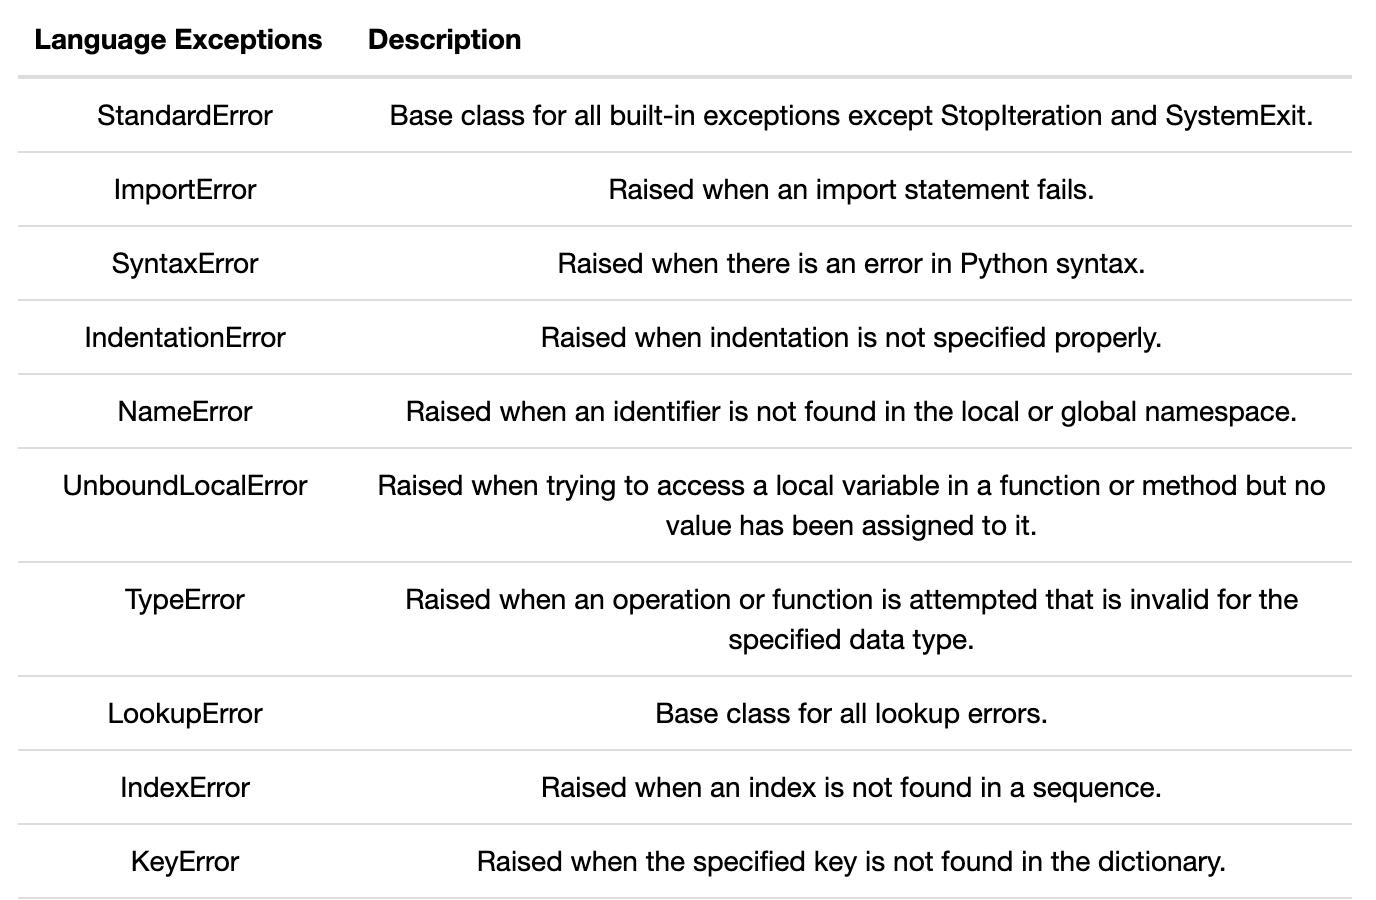

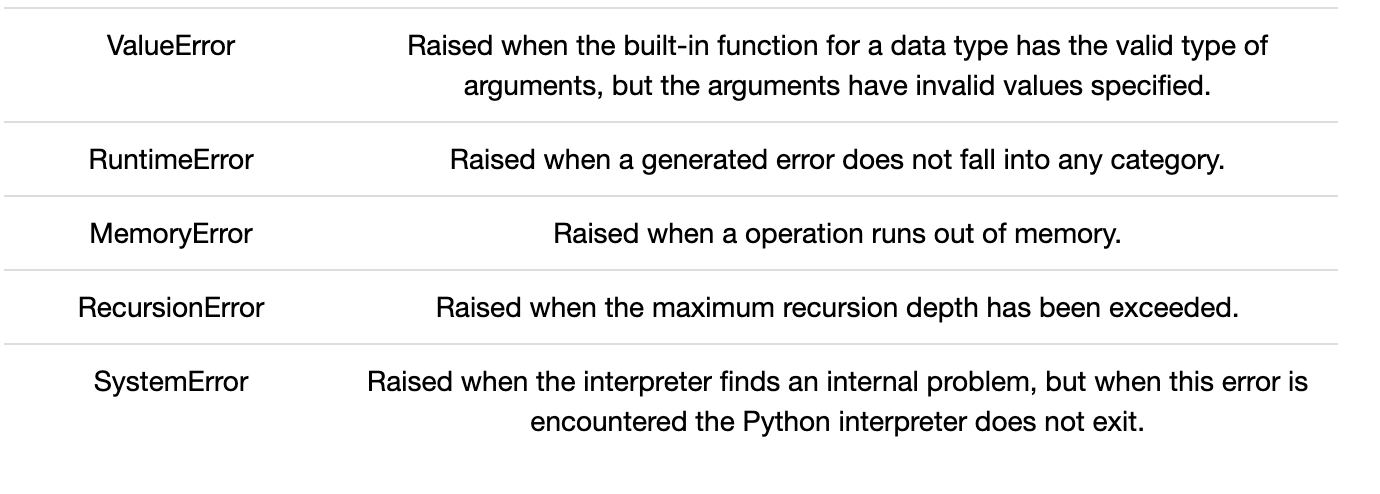

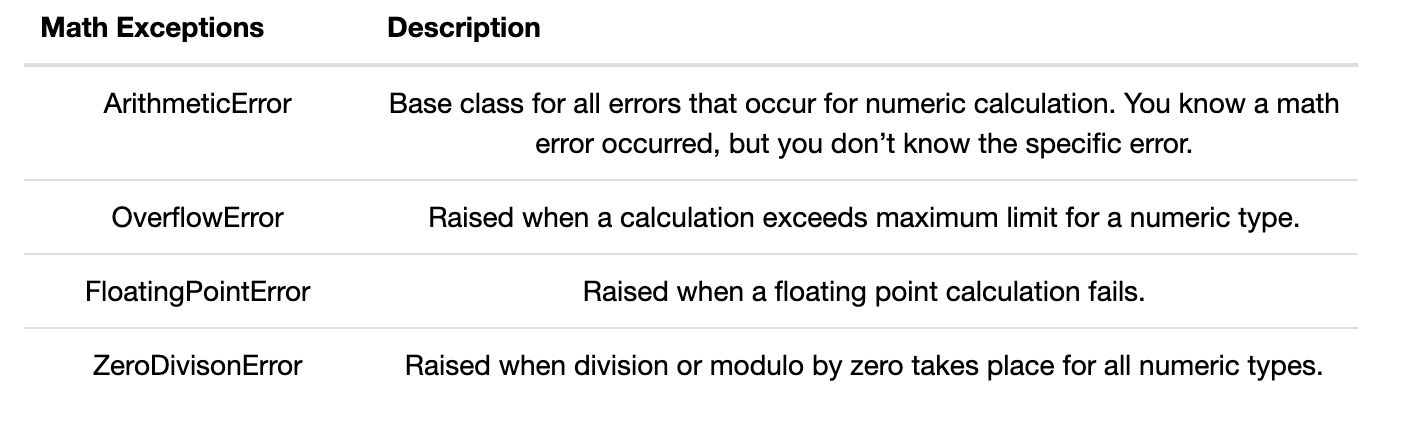

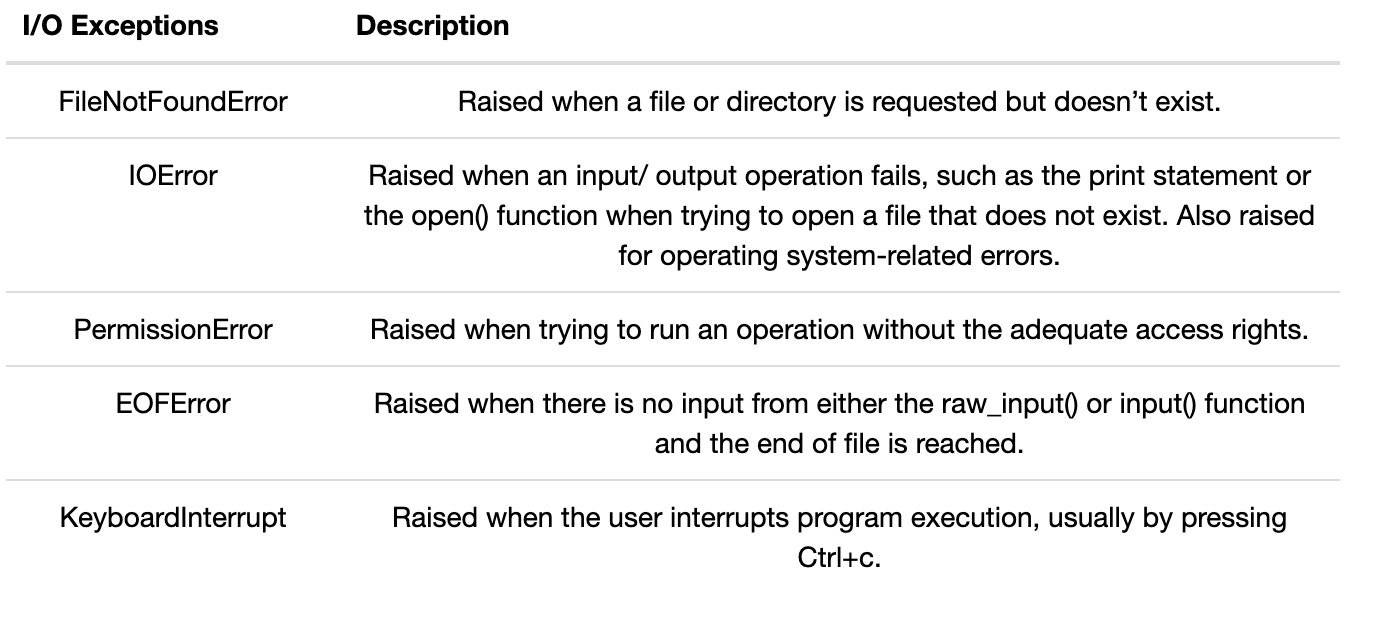

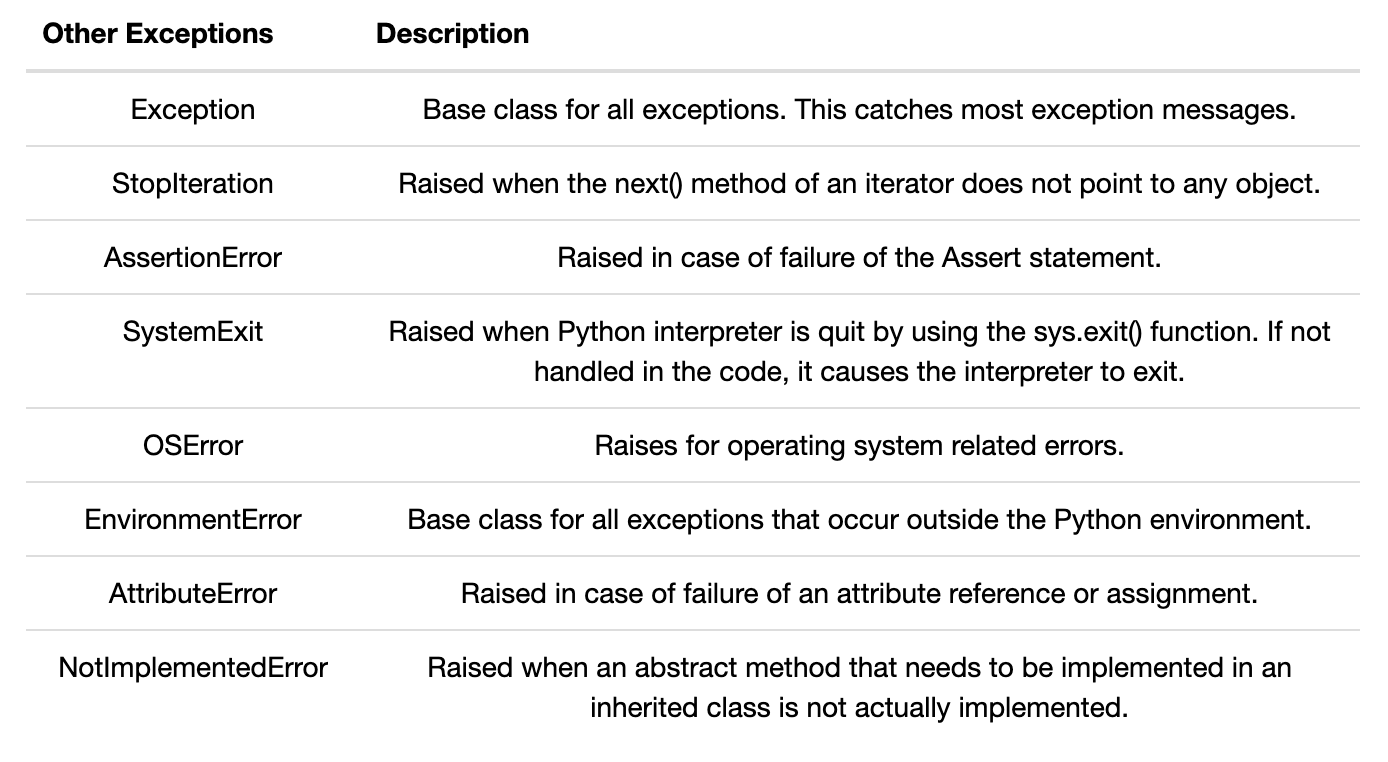

* All exceptions are objects. The classes that define the objects are organized in a hierarchy, which is shown below. This is important because the parent class of a set of related exceptions will catch all exception messages for itself and its child exceptions. For example, an ArithmeticError exception will catch itself and all FloatingPointError, OverflowError, and ZeroDivisionError exceptions.

### Unit Assesment

1. The code below takes the list of country, country, and searches to see if it is in the dictionary gold which shows some countries who won gold during the Olympics. However, this code currently does not work. Correctly add try/except clause in the code so that it will correctly populate the list, country_gold, with either the number of golds won or the string “Did not get gold”.

In [61]:
gold = {"US":46, "Fiji":1, "Great Britain":27, "Cuba":5, "Thailand":2, "China":26, "France":10}
country = ["Fiji", "Chile", "Mexico", "France", "Norway", "US"]
country_gold = []

# for x in country:
#     country_gold.append(gold[x])
#     country_gold.append("Did not get gold")

for x in country:
    try:
        country_gold.append(gold[x])
    except KeyError as ke:
        country_gold.append('Did not get gold')

print(country_gold)

[1, 'Did not get gold', 'Did not get gold', 10, 'Did not get gold', 46]


2. Provided is a buggy for loop that tries to accumulate some values out of some dictionaries. Insert a try/except so that the code passes.

In [65]:
di = [{"Puppies": 17, 'Kittens': 9, "Birds": 23, 'Fish': 90, "Hamsters": 49}, {"Puppies": 23, "Birds": 29, "Fish": 20, "Mice": 20, "Snakes": 7}, {"Fish": 203, "Hamsters": 93, "Snakes": 25, "Kittens": 89}, {"Birds": 20, "Puppies": 90, "Snakes": 21, "Fish": 10, "Kittens": 67}]
total = 0
# for diction in di:
#     total = total + diction['Puppies']

for pet_dict in di:
    try:
        total += pet_dict['Puppies']
    except KeyError as ke:
        continue;
        
print("Total number of puppies:", total)

Total number of puppies: 130


3. The list, numb, contains integers. Write code that populates the list remainder with the remainder of 36 divided by each number in numb. For example, the first element should be 0, because 36/6 has no remainder. If there is an error, have the string “Error” appear in the remainder.

In [79]:
numb = [6, 0, 36, 8, 2, 36, 0, 12, 60, 0, 45, 0, 3, 23]

remainder = []
remainder_error_idx_type = []
for idx, num in enumerate(numb):
    try:
        36 / num
        remainder.append(36 % num)
    except ZeroDivisionError as e:
        remainder.append('Error')
        remainder_error_idx_type.append((type(e), idx))

print(remainder)
print(remainder_error_idx_type)

[0, 'Error', 0, 4, 0, 0, 'Error', 0, 36, 'Error', 36, 'Error', 0, 13]
[(<class 'ZeroDivisionError'>, 1), (<class 'ZeroDivisionError'>, 6), (<class 'ZeroDivisionError'>, 9), (<class 'ZeroDivisionError'>, 11)]


4. Provided is buggy code, insert a try/except so that the code passes.

```python
lst = [2,4,10,42,12,0,4,7,21,4,83,8,5,6,8,234,5,6,523,42,34,0,234,1,435,465,56,7,3,43,23]

lst_three = []

for num in lst:
    if 3 % num == 0:
        lst_three.append(num)

```

In [80]:
lst = [2,4,10,42,12,0,4,7,21,4,83,8,5,6,8,234,5,6,523,42,34,0,234,1,435,465,56,7,3,43,23]

lst_three = []

for num in lst:
    try:
        if 3 % num == 0:
            lst_three.append(num)
        else:
            continue
    except Exception as e:
        print(type(e))
        
print(lst_three)

<class 'ZeroDivisionError'>
<class 'ZeroDivisionError'>
[1, 3]


* This passed their unit test for the assessment

5. Write code so that the buggy code provided works using a try/except. When the codes does not work in the try, have it append to the list attempt the string “Error”.

```python

full_lst = ["ab", 'cde', 'fgh', 'i', 'jkml', 'nop', 'qr', 's', 'tv', 'wxy', 'z']

attempt = []

for elem in full_lst:
    attempt.append(elem[1])

```
* Just looks like an IndexError that is trying to add the second character and we would get an error for the 4th index or full_lst[3] when trying to append the second index spot for a value with only one subscriptable index

In [82]:
full_lst = ["ab", 'cde', 'fgh', 'i', 'jkml', 'nop', 'qr', 's', 'tv', 'wxy', 'z']

attempt = []
except_fails = []
for elem in full_lst:
    try:
        attempt.append(elem[1])
    except IndexError as E:
        attempt.append('Error')
        except_fails.append(elem)

print(attempt)
print(except_fails)

['b', 'd', 'g', 'Error', 'k', 'o', 'r', 'Error', 'v', 'x', 'Error']
['i', 's', 'z']


6. The following code tries to append the third element of each list in conts to the new list third_countries. Currently, the code does not work. Add a try/except clause so the code runs without errors, and the string ‘Continent does not have 3 countries’ is appended to countries instead of producing an error.

In [83]:

conts = [['Spain', 'France', 'Greece', 'Portugal', 'Romania', 'Germany'], ['USA', 'Mexico', 'Canada'], ['Japan', 'China', 'Korea', 'Vietnam', 'Cambodia'], ['Argentina', 'Chile', 'Brazil', 'Ecuador', 'Uruguay', 'Venezuela'], ['Australia'], ['Zimbabwe', 'Morocco', 'Kenya', 'Ethiopa', 'South Africa'], ['Antarctica']]

third_countries = []

for c in conts:
    try:
        third_countries.append(c[2])
    except IndexError as ie:
        third_countries.append('Continent does not have 3 countries')

print(third_countries)

['Greece', 'Canada', 'Korea', 'Brazil', 'Continent does not have 3 countries', 'Kenya', 'Continent does not have 3 countries']


7. The buggy code below prints out the value of the sport in the list sport. Use try/except so that the code will run properly. If the sport is not in the dictionary, ppl_play, add it in with the value of 1.

```python

sport = ["hockey", "basketball", "soccer", "tennis", "football", "baseball"]

ppl_play = {"hockey":4, "soccer": 10, "football": 15, "tennis": 8}

for x in sport:

     print(ppl_play[x])


```

In [85]:

sport = ["hockey", "basketball", "soccer", "tennis", "football", "baseball"]

ppl_play = {"hockey":4, "soccer": 10, "football": 15, "tennis": 8}

for x in sport:
    try:
        x in ppl_play.keys()
        print(ppl_play[x])
    except KeyError as E:
        ppl_play[x] = 1
        
print(ppl_play)

4
10
8
15
{'hockey': 4, 'soccer': 10, 'football': 15, 'tennis': 8, 'basketball': 1, 'baseball': 1}


8. Provided is a buggy for loop that tries to accumulate some values out of some dictionaries. Insert a try/except so that the code passes. If the key is not there, initialize it in the dictionary and set the value to zero.

```python

di = [{"Puppies": 17, 'Kittens': 9, "Birds": 23, 'Fish': 90, "Hamsters": 49}, {"Puppies": 23, "Birds": 29, "Fish": 20, "Mice": 20, "Snakes": 7}, {"Fish": 203, "Hamsters": 93, "Snakes": 25, "Kittens": 89}, {"Birds": 20, "Puppies": 90, "Snakes": 21, "Fish": 10, "Kittens": 67}]
total = 0
for diction in di:
    total = total + diction['Puppies']

print("Total number of puppies:", total)

```

In [88]:
di = [{"Puppies": 17, 'Kittens': 9, "Birds": 23, 'Fish': 90, "Hamsters": 49}, {"Puppies": 23, "Birds": 29, "Fish": 20, "Mice": 20, "Snakes": 7}, {"Fish": 203, "Hamsters": 93, "Snakes": 25, "Kittens": 89}, {"Birds": 20, "Puppies": 90, "Snakes": 21, "Fish": 10, "Kittens": 67}]
total = 0
for diction in di:
    try:
        'Puppies' in diction.keys()
        total += diction['Puppies']
    except KeyError as ke:
        diction['Puppies'] = 0
        
print(di)
print("Total number of puppies:", total)

[{'Puppies': 17, 'Kittens': 9, 'Birds': 23, 'Fish': 90, 'Hamsters': 49}, {'Puppies': 23, 'Birds': 29, 'Fish': 20, 'Mice': 20, 'Snakes': 7}, {'Fish': 203, 'Hamsters': 93, 'Snakes': 25, 'Kittens': 89, 'Puppies': 0}, {'Birds': 20, 'Puppies': 90, 'Snakes': 21, 'Fish': 10, 'Kittens': 67}]
Total number of puppies: 130
